# Проект Эчеверриа Арамбильета Антона, 211, 
# по курсу "Статистический анализ в Python"

In [248]:
from __future__ import print_function
import math
import warnings
from io import StringIO
import numpy as np
import pandas as pd
from scipy import stats
import patsy
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import KernelPCA, PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc,classification_report,ConfusionMatrixDisplay,RocCurveDisplay)

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

## Презентация датасета

В датасете рассматриваются некоторые биологические показатели людей (кроме лёгочных). На основе этих данных предлагается предсказать, является ли человек курильщиком

In [250]:
df = pd.read_csv('smoker.csv')
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,97,239,153,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,88,211,128,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,80,193,120,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,249,210,366,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,100,179,200,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,93,144,53,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,115,225,196,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,102,206,48,79,116,12.0,1,0.6,24,20,17,0,1


In [251]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,99.342269,196.883491,126.749461,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,20.642741,36.353945,71.803143,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,219.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,423.000000,445.000000,999.000000,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [252]:
df.isnull().all()

age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
dental caries          False
smoking                False
dtype: bool

### В датасете отсутствуют какие-либо пропуски, что значительно упрощает дальнейший анализ

Рассмотрим приблизительные распределения каждого из показателей, чтобы выдвинуть гипотезы

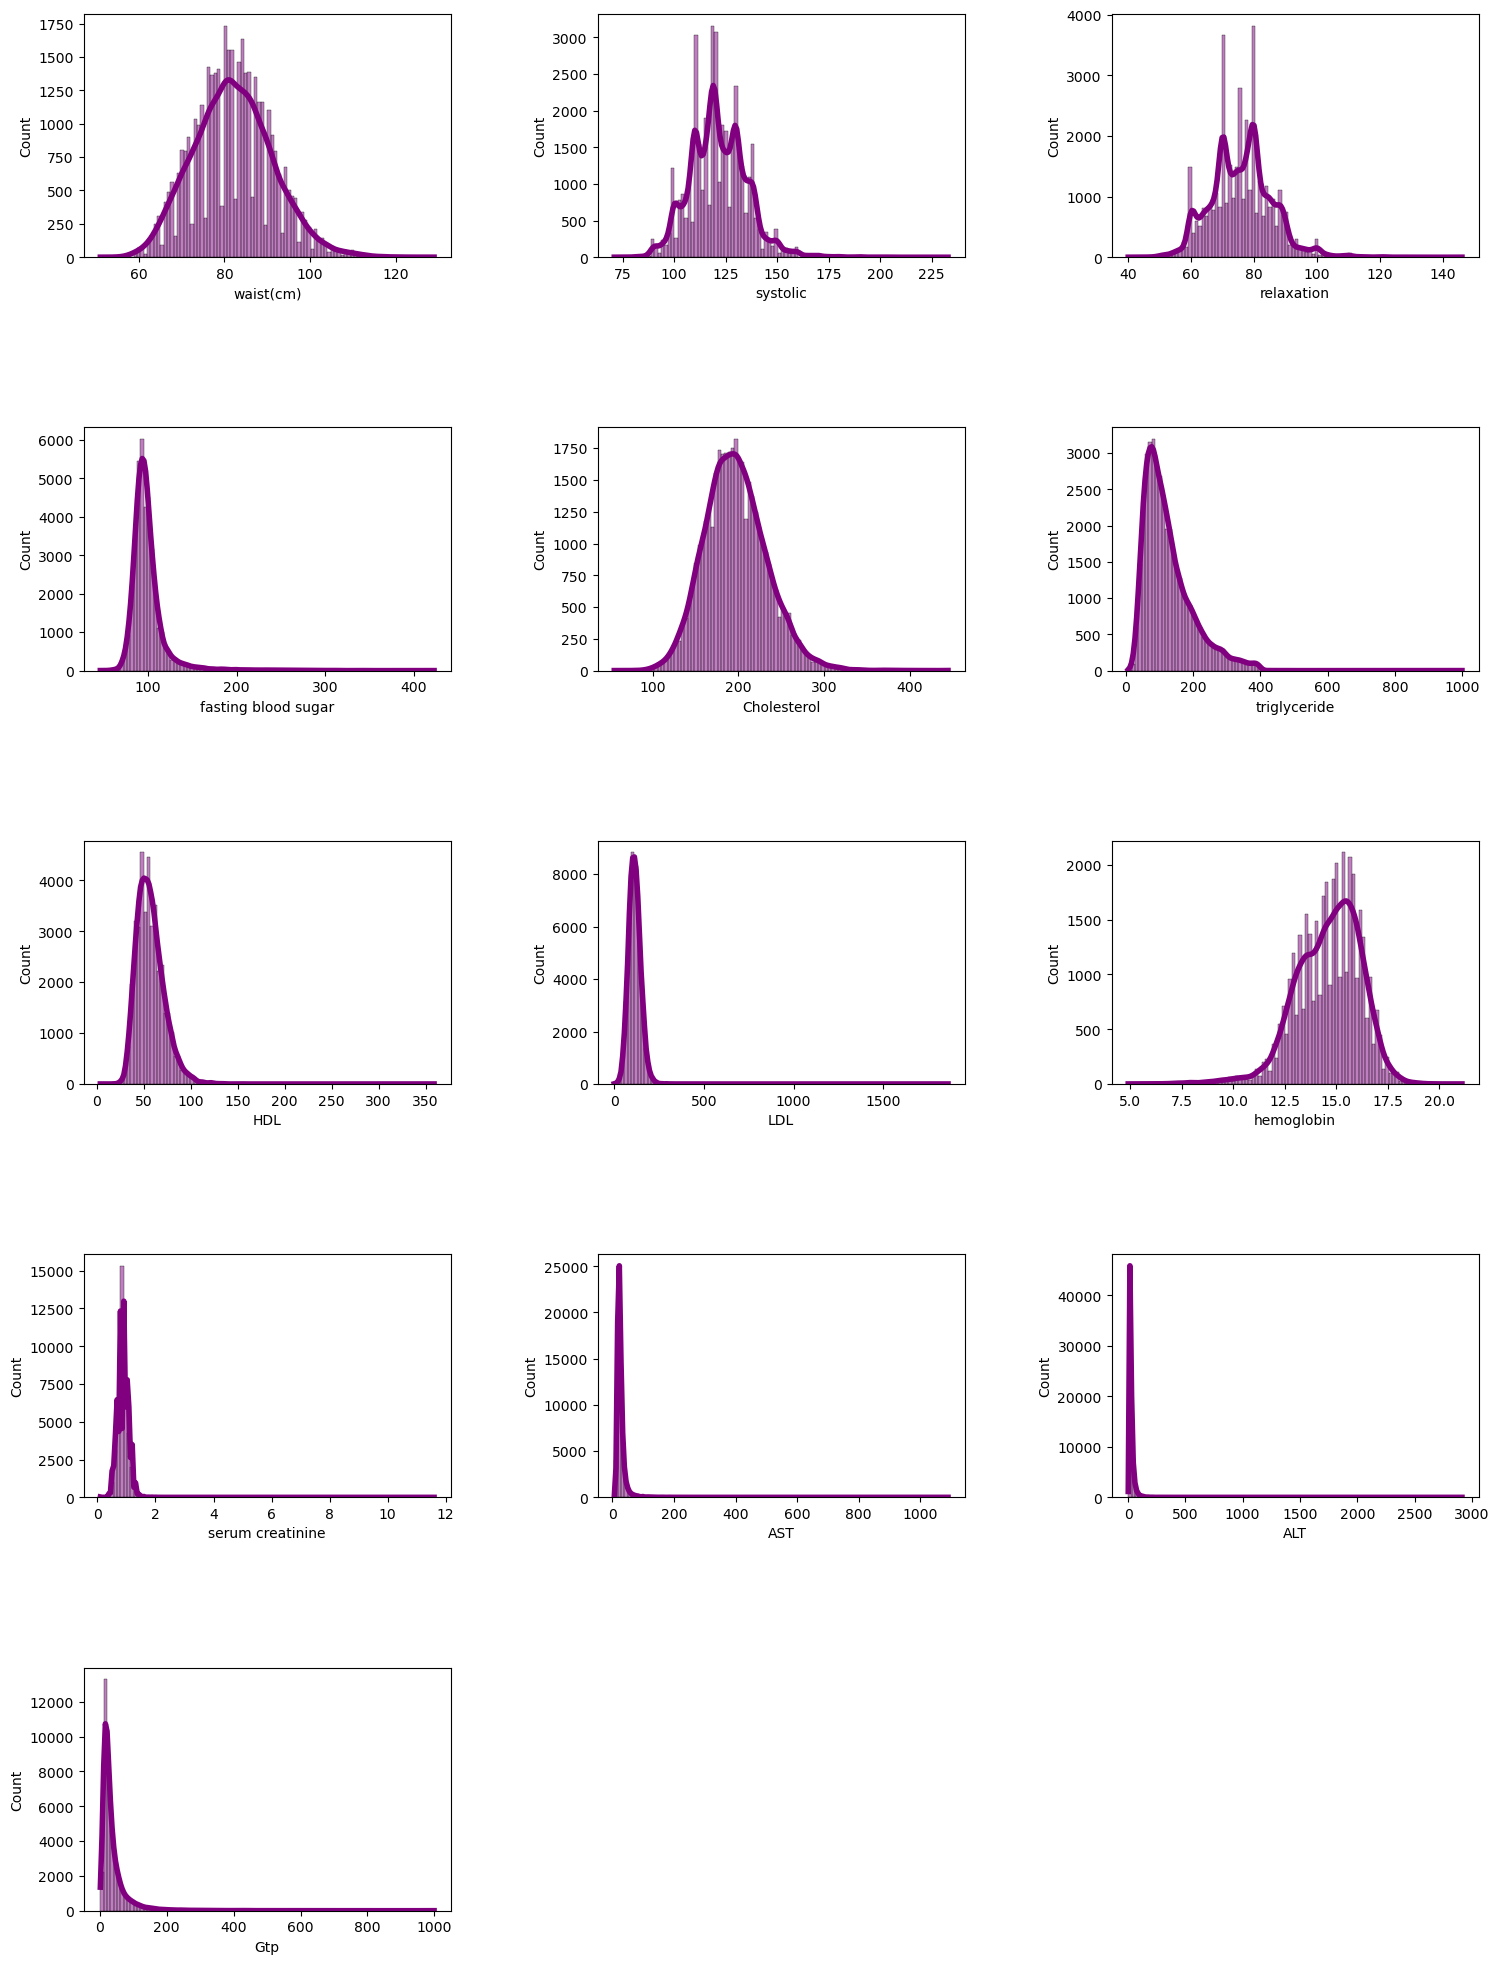

In [255]:
columns = ['waist(cm)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','serum creatinine','AST','ALT','Gtp']
length = len(columns)
plt.figure(figsize=(18, 30))

for i,j in zip(columns,range(length)):
    plt.subplot((length//2), 3, j+1)
    plt.subplots_adjust(wspace=.4, hspace=.7)
    sns.histplot(
        df[i],  
        kde=True,
        color='purple',
        bins=100,
        line_kws={'linewidth': 4, 'color': 'red'}
        )
    #plt.title(i)
plt.show()

In [256]:
df['serum creatinine'].unique()

array([ 1. ,  1.1,  0.6,  0.9,  1.2,  1.4,  0.7,  0.5,  0.8,  1.3,  1.7,
        0.4,  1.9,  1.6,  1.5,  0.1,  2.2,  0.3,  1.8,  3.3,  5.9,  2.1,
        7.4,  2.5,  2. ,  6.4,  3. , 11.6,  2.6,  0.2,  3.4,  9.9,  5. ,
       10. ])

Можно заметить, что признак 'serum creatinine' имеет довольно мало значений, чтобы считать его непрерывным, поэтому будем считать его дискретным

In [258]:
df['eyesight(left)'].unique()

array([0.9, 0.7, 0.8, 1.5, 1. , 1.2, 0.5, 0.3, 0.4, 0.6, 0.1, 0.2, 9.9,
       2. , 1.8, 1.6, 1.1, 1.3, 1.9])

Печеночные признаки ('ALT', 'AST', 'Gtp') имеют довольно тяжелые хвосты, что затрудняет дальнейший анализ. Поэтому будем только рассматривать эти признаки в рамках определенных ограничений

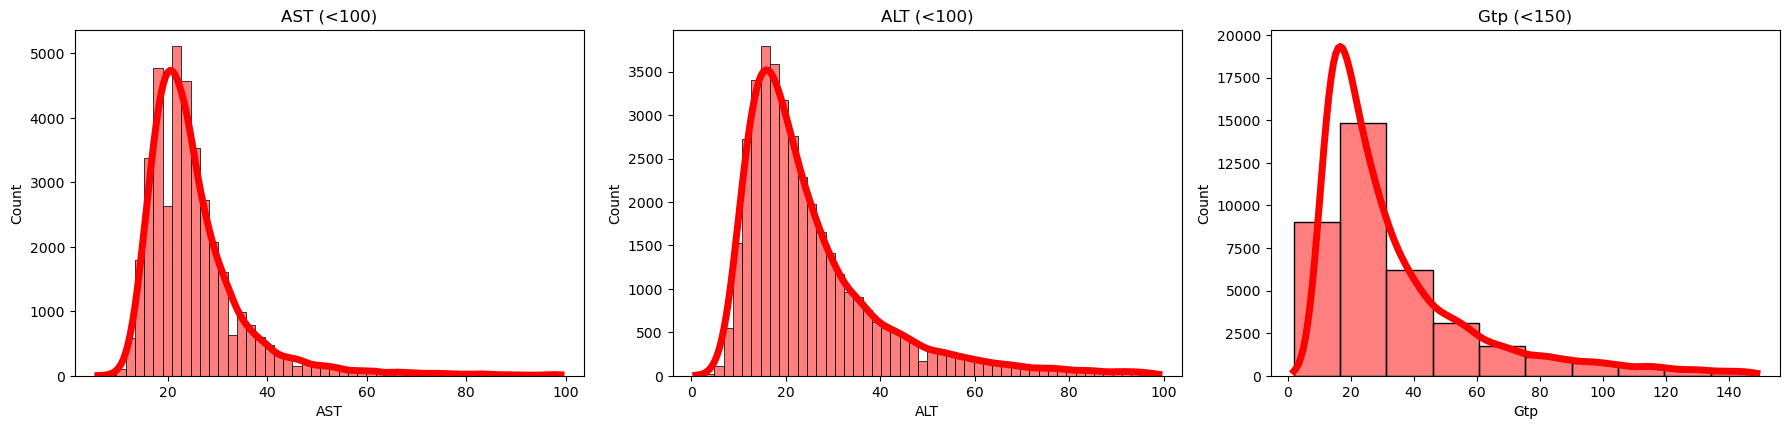

In [260]:
plt.figure(figsize=(18, 8))

# AST
plt.subplot(2, 3, 1)
df_for_ast = df[df['AST'] < 100]
sns.histplot(
    df_for_ast['AST'],
    kde=True,
    color='red',
    bins=50,
    line_kws={'linewidth': 5}
)
plt.title('AST (<100)')

# ALT
plt.subplot(2, 3, 2)
df_for_alt = df[df['ALT'] < 100]
sns.histplot(
    df_for_alt['ALT'],
    kde=True,
    color='red',
    bins=50,
    line_kws={'linewidth': 5}
)
plt.title('ALT (<100)')

# Gtp
plt.subplot(2, 3, 3)
df_for_gtp = df[df['Gtp'] < 150]
sns.histplot(
    df_for_gtp['Gtp'],  
    kde=True,
    color='red',
    bins=10,
    line_kws={'linewidth': 5}
)
plt.title('Gtp (<150)')

plt.tight_layout()
plt.show()


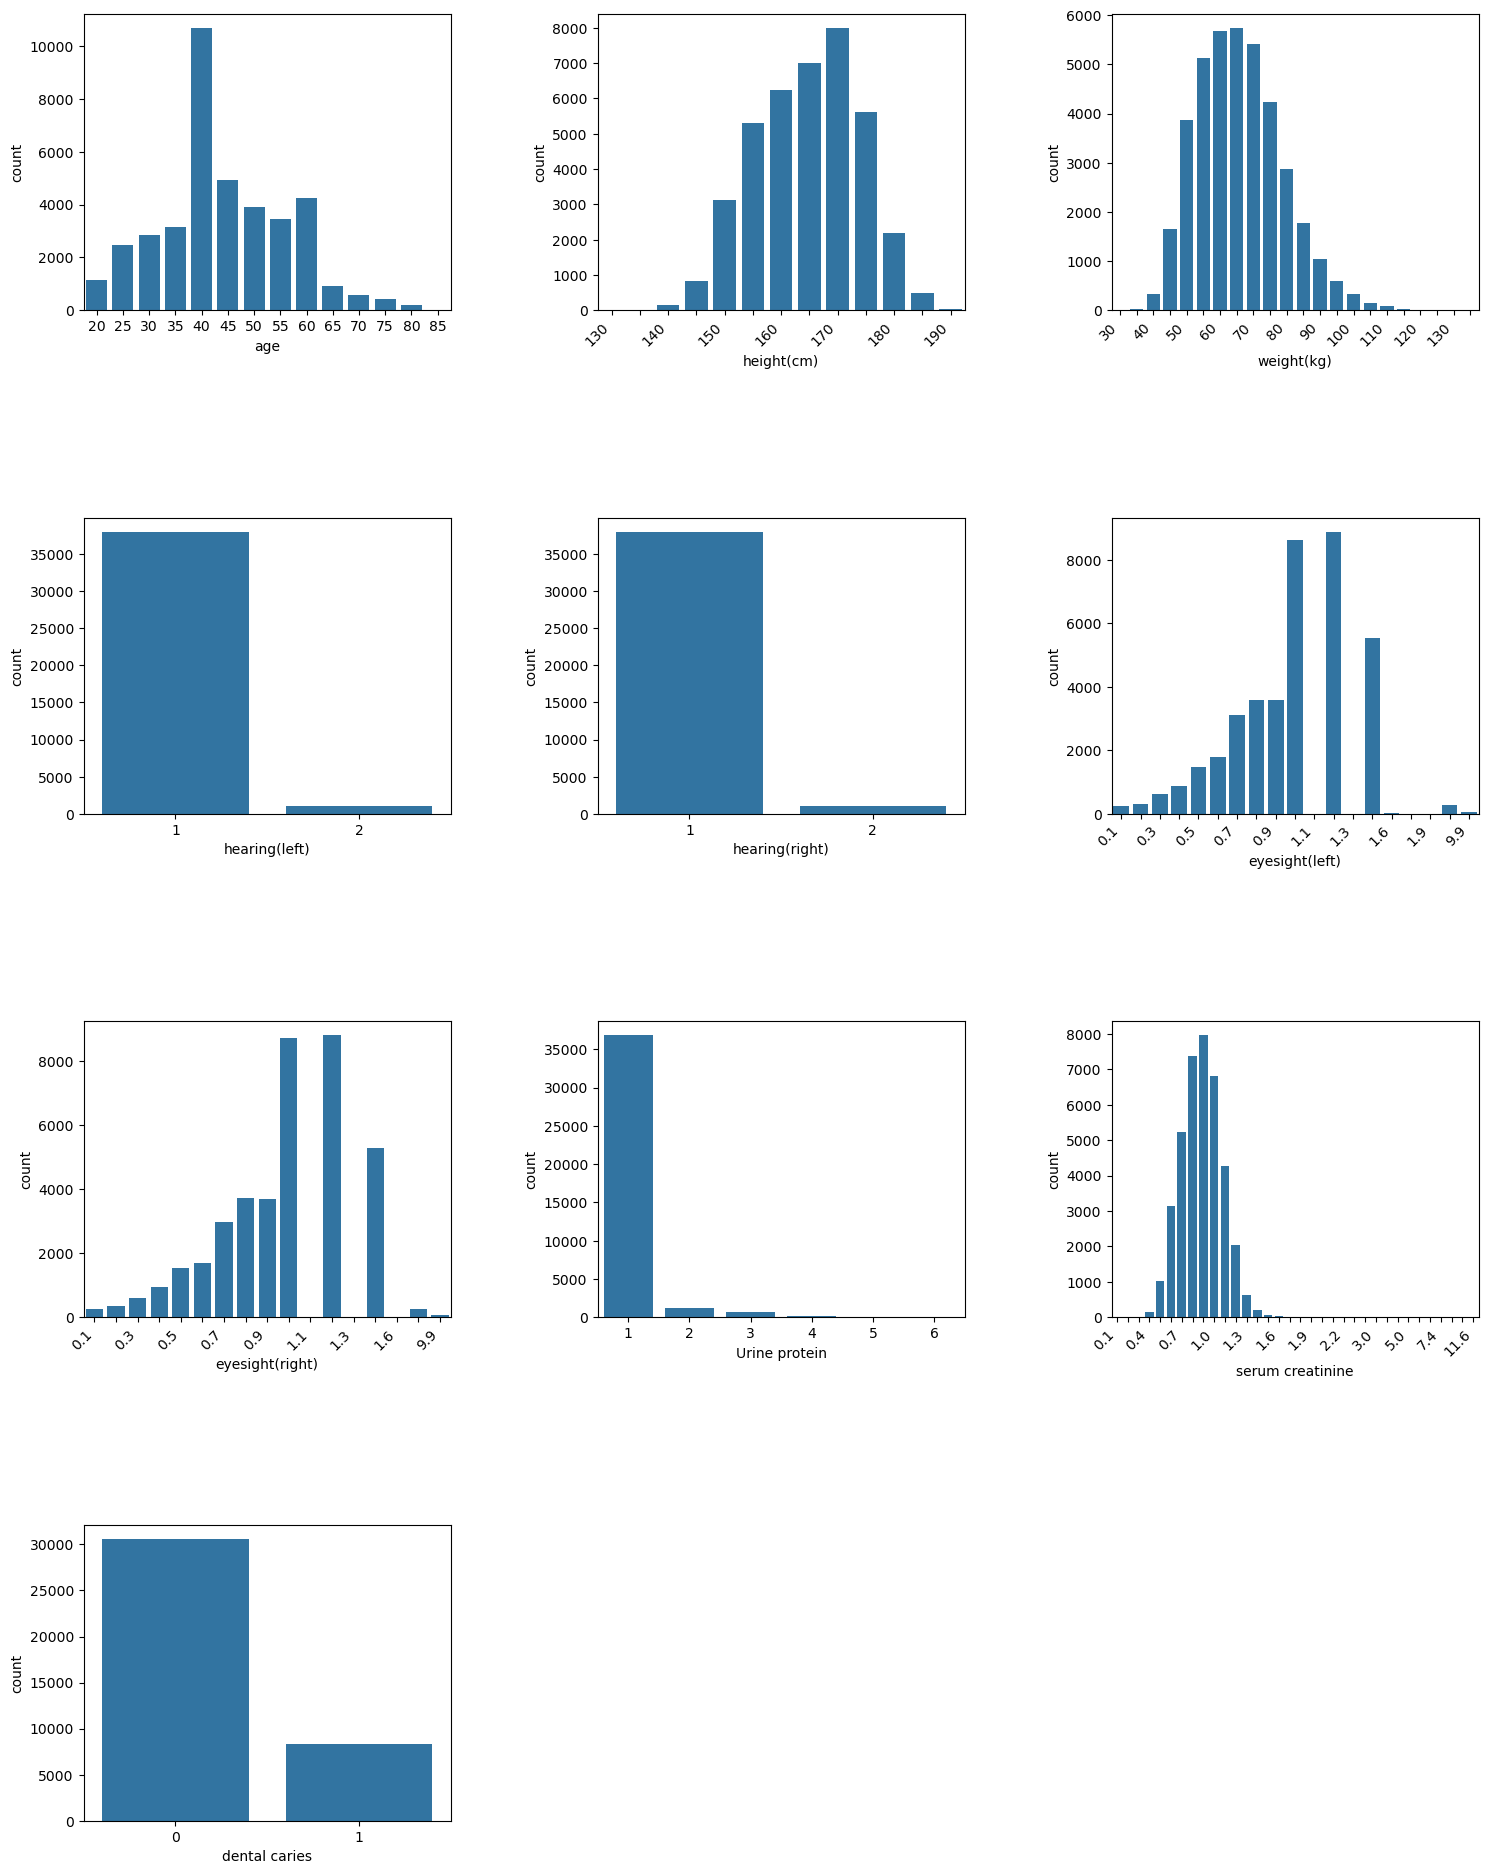

In [261]:
columns = ['age','height(cm)','weight(kg)','hearing(left)','hearing(right)','eyesight(left)','eyesight(right)','Urine protein','serum creatinine','dental caries']
length = len(columns)
plt.figure(figsize=(18, 30))

for i, j in zip(columns, range(length)):
    ax = plt.subplot((length//2), 3, j+1)
    plt.subplots_adjust(wspace=.4, hspace=.7)
    sns.countplot(
        x=i,
        data=df,
    )
    if i in ['height(cm)', 'weight(kg)', 'serum creatinine','eyesight(left)','eyesight(right)']:
        ticks = ax.get_xticklabels()
        step = 3 if i == 'serum creatinine' else 2
        new_labels = [tick.get_text() if idx % step == 0 else '' for idx, tick in enumerate(ticks)]
        ax.set_xticklabels(new_labels, rotation=45, ha='right')
    
plt.show()

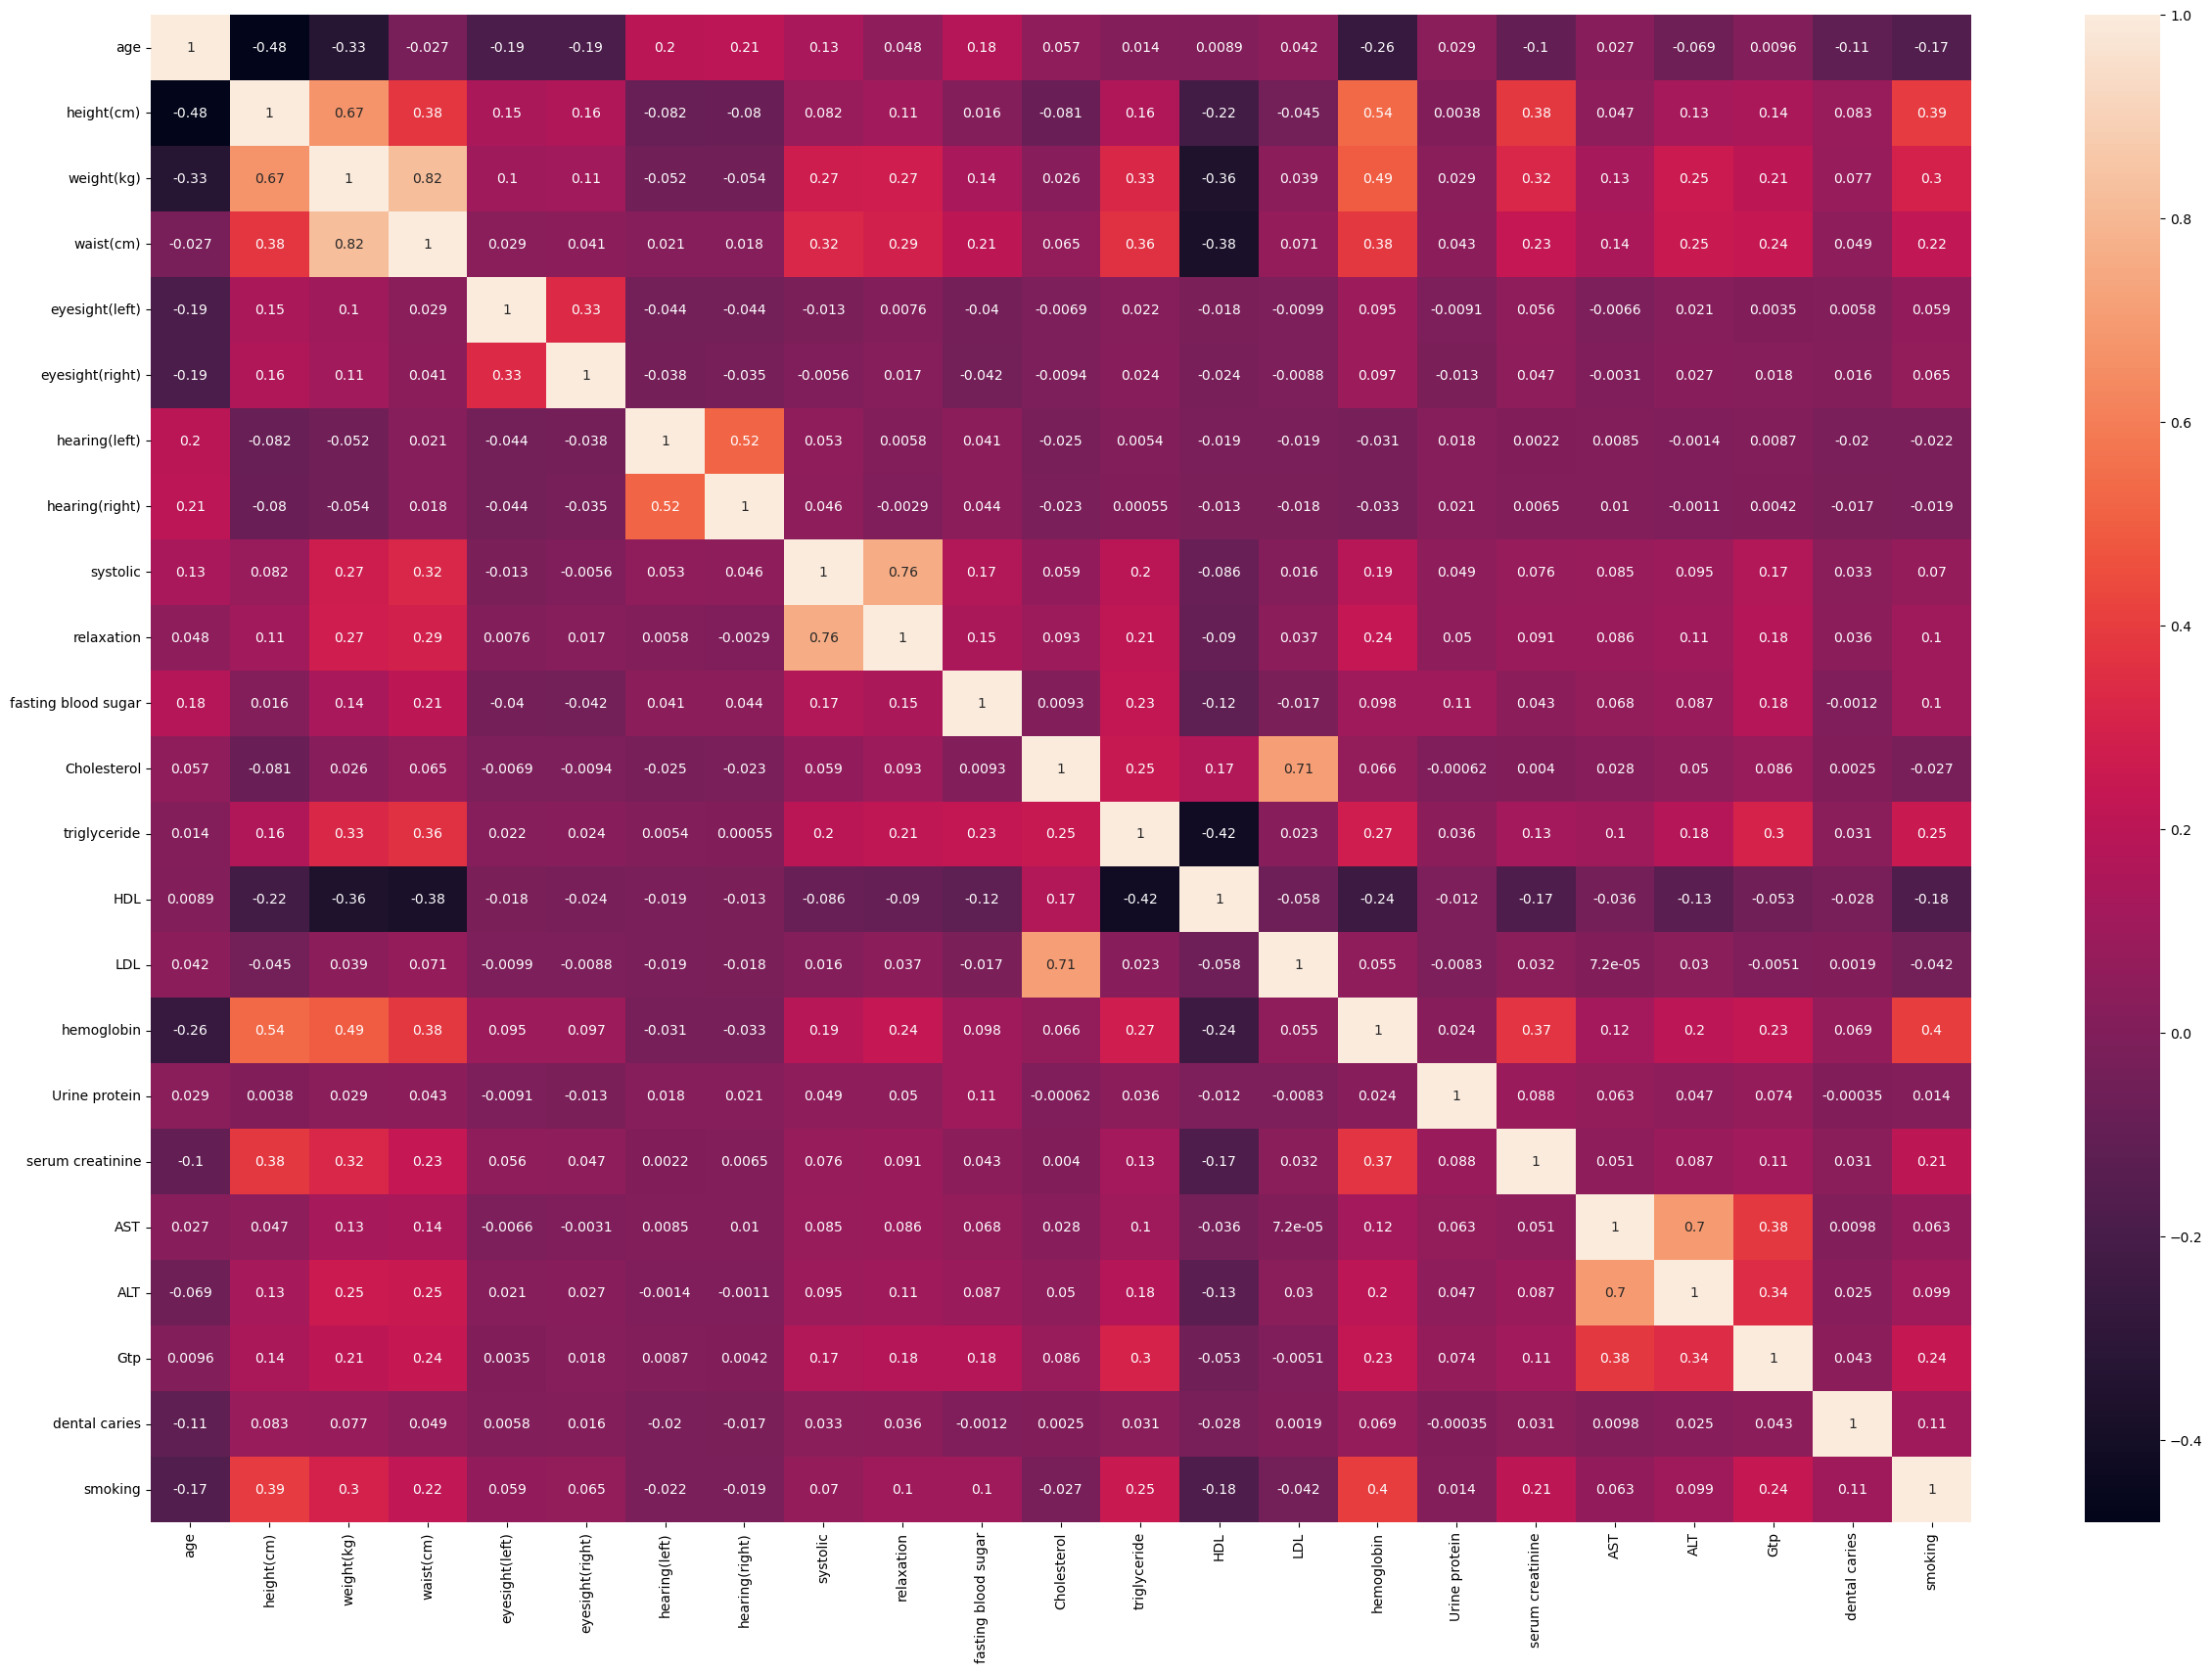

In [262]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True);

# Выдвижение гипотез

Из графиков эмпирических распределений и корреляционной таблицы, будут выдвижены следующие гипотезы:
- О распределении:
  - "AST"
  - "Gtp"
  - "waist(cm)"
  - "Cholesterol"
- О независимости:
  - "Urine protein" и "dental caries"
  - "height(cm)" и "hearing(left)"
  - "height(cm)" и "weight(kg)"
- Об однородности:
  - "Urine protein" и "Cholesterol"
  - "smoking" со всеми остальными признаками
  

# Проверка гипотез

In [265]:
sample = df[df['AST'] < 70]['AST']
params = stats.lognorm.fit(sample[:1000])
result = stats.kstest(sample[:1000], 'lognorm', args=params)
result

KstestResult(statistic=0.05085423044978088, pvalue=0.01094458365713639, statistic_location=27, statistic_sign=1)

In [266]:
params = stats.gamma.fit(sample[:1000])
result = stats.kstest(sample[:1000], 'gamma', args=params)
result

KstestResult(statistic=0.07505925740274466, pvalue=2.4025420139095553e-05, statistic_location=27, statistic_sign=1)

In [267]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

params = stats.invgamma.fit(sample[:1000])
result = stats.kstest(sample[:1000], 'invgamma', args=params)
result

KstestResult(statistic=0.04246556825273351, pvalue=0.052734400764471445, statistic_location=27, statistic_sign=1)

In [268]:
print(stats.normaltest(sample))
print(stats.shapiro(sample))
print(stats.jarque_bera(sample))

NormaltestResult(statistic=12907.436706732216, pvalue=0.0)
ShapiroResult(statistic=0.8680151536041685, pvalue=6.038626680746918e-98)
SignificanceResult(statistic=44497.63864832467, pvalue=0.0)


### => не опровергается гипотеза о распределении Обратная Гамма для "AST"

###

In [271]:
sample = df['Gtp']
params = stats.lognorm.fit(sample[:1500])
result = stats.kstest(sample[:1500], 'lognorm', args=params)
result

KstestResult(statistic=0.051360336170759635, pvalue=0.000704344531363651, statistic_location=25, statistic_sign=1)

In [272]:
params = stats.gamma.fit(sample[:1500])
result = stats.kstest(sample[:1500], 'gamma', args=params)
result

KstestResult(statistic=0.9709521143472095, pvalue=0.0, statistic_location=10, statistic_sign=-1)

In [273]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

params = stats.invgamma.fit(sample[:1500])
result = stats.kstest(sample[:1500], 'invgamma', args=params)
result

KstestResult(statistic=0.03484706682351113, pvalue=0.0511237786450468, statistic_location=19, statistic_sign=1)

In [274]:
print(stats.normaltest(sample[:1500]))
print(stats.shapiro(sample[:1500]))
print(stats.jarque_bera(sample[:1500]))

NormaltestResult(statistic=1604.9388026152087, pvalue=0.0)
ShapiroResult(statistic=0.5329478111272652, pvalue=9.97566650973583e-53)
SignificanceResult(statistic=114324.8162778273, pvalue=0.0)


### => не опровергается гипотеза о распределении Обратная Гамма для "Gtp"

###

In [277]:
sample = df[df['waist(cm)'] < 110]['waist(cm)']
print(stats.normaltest(sample[:1500]))
print(stats.shapiro(sample[:1500]))
print(stats.jarque_bera(sample[:1500]))

NormaltestResult(statistic=5.853633742791648, pvalue=0.053567278589565344)
ShapiroResult(statistic=0.9968922259459647, pvalue=0.004351816145640919)
SignificanceResult(statistic=5.651512891448119, pvalue=0.05926381001380984)


### => не опровергается гипотеза о нормальном распределении для "waist(cm)"
(Шапиро опровергает из-за небольшого хвоста справа)
###

In [279]:
sample = df[df['Cholesterol'] <= 300]['Cholesterol']
print(stats.normaltest(sample[:1000]))
print(stats.shapiro(sample[:1000]))
print(stats.jarque_bera(sample[:1000]))

NormaltestResult(statistic=5.064278053670278, pvalue=0.07948880961134487)
ShapiroResult(statistic=0.9958832885161596, pvalue=0.009069139821125664)
SignificanceResult(statistic=5.138260361448612, pvalue=0.07660214647783806)


### => не опровергается гипотеза о нормальном распределении для "Cholesterol"
(Шапиро опровергает из-за небольшого хвоста справа)

In [281]:
# Независимость категориальных

contingency_table = pd.crosstab(df['Urine protein'], df['dental caries'])
result = stats.chi2_contingency(contingency_table)
result.pvalue

0.38829113469150706

### => не опровергается гипотеза о независимости "Urine proterin" и "dental caries"
###

In [283]:
# Опровержение независимости категориальных
contingency_table = pd.crosstab(df['height(cm)'], df['hearing(left)'])
result = stats.chi2_contingency(contingency_table)
result.pvalue

4.030150284755209e-69

### => опровергается гипотеза о независимости "height(cm)" и "hearing(left)"
###

In [285]:
# Зависимость категориальных

contingency_table = pd.crosstab(df['height(cm)'], df['weight(kg)'])
result = stats.chi2_contingency(contingency_table)
result.pvalue

0.0

### => "height(cm)" и "weight(kg)" имеют зависимость
#

In [287]:
# Для построения графиков

def countplot_with_perc(x, data, hue):
    ax         = sns.countplot(x=x, data=data, hue=hue);
    bars       = ax.patches
    half       = int(len(bars)/2-1)
    left_bars  = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total    = height_l + height_r
        #ax.text(left.get_x() + left.get_width()/2.,
         #   height_l + 40, '{0:.0%}'.format(height_l/total), ha='center');
        #ax.text(right.get_x() + right.get_width()/2.,
         #   height_r + 40, '{0:.0%}'.format(height_r/total), ha='center');

def histplot_continuous(x, data, hue, kde, ax=None):
    sns.histplot(data=data, x=x, hue=hue, ax=ax,
        kde=kde, bins=15, palette='tab10', multiple='stack', line_kws={'lw': 5});

Text(0.5, 0, '')

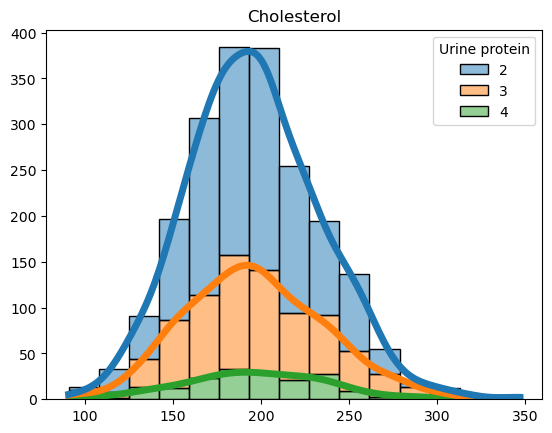

In [288]:
df_sub = df[df['Urine protein'].isin([2, 3, 4])]

histplot_continuous(x='Cholesterol', data=df_sub, hue='Urine protein', kde=True)
plt.title('Cholesterol')
plt.ylabel(None)
plt.xlabel(None)

In [289]:
# Успешная однородность

chol_neg = df[df['Urine protein']==1]['Cholesterol']
chol_pos = df[df['Urine protein']!=1]['Cholesterol']
t, pvalue = stats.ttest_ind(chol_neg, chol_pos, equal_var=False)
pvalue

0.4375943620966021

### => не опровергается однородность "Urine protein" и "Cholesterol"
###


## Далее будет проводиться анализ признака, отвечающий за курение. 

In [292]:
df['smoking'] = df['smoking'].map({0: 'No', 1: 'Yes'})

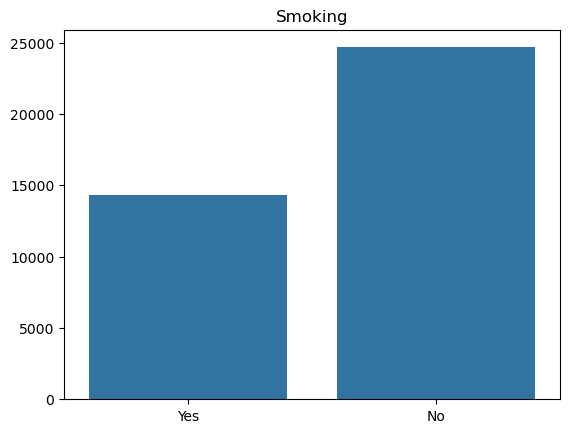

In [293]:
sns.countplot(x = "smoking", data=df)
plt.title('Smoking')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

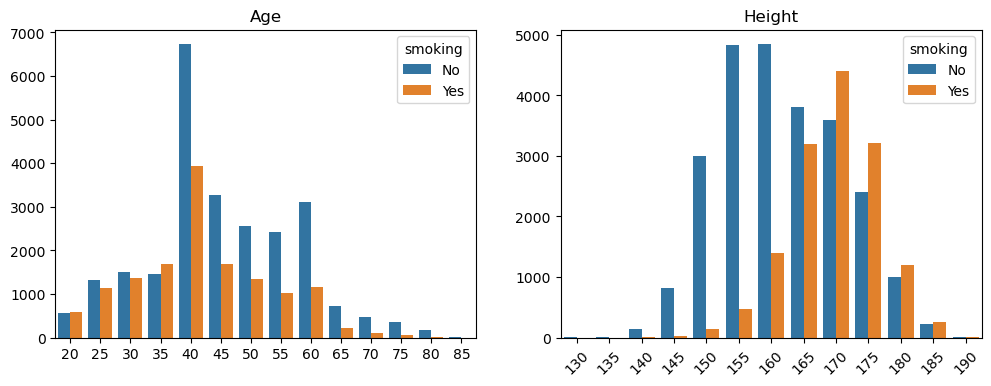

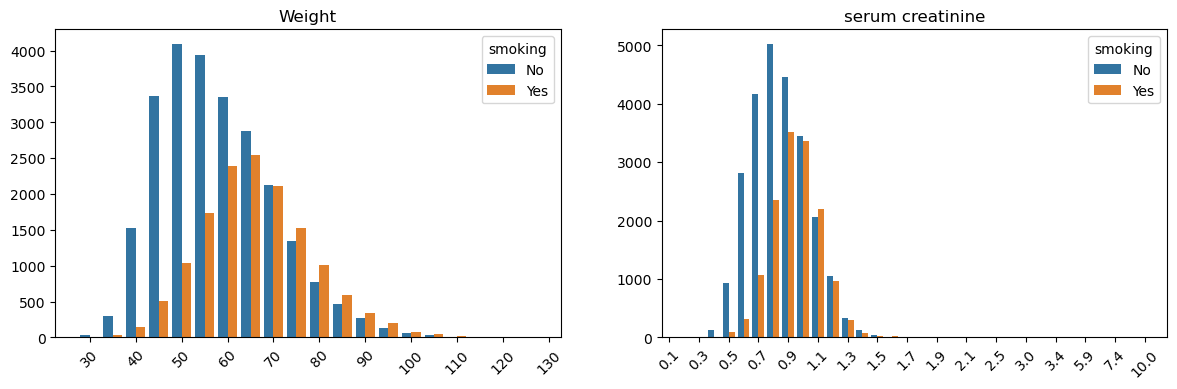

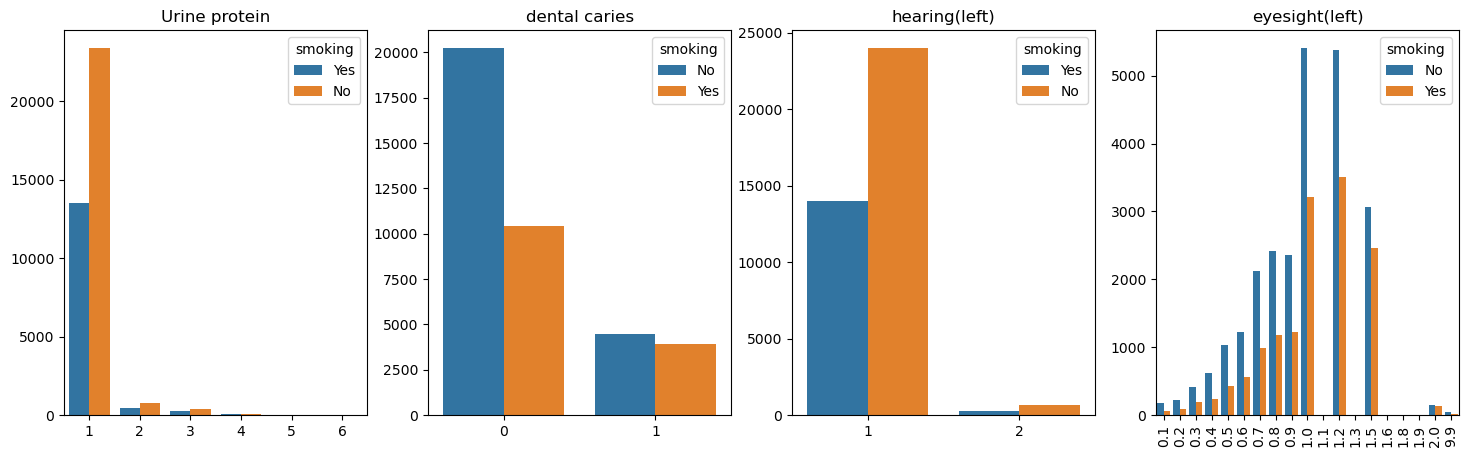

In [294]:
hue = 'smoking'
n_row, n_col = 1, 4
plt.figure(figsize=(25, 4))

plt.subplot(n_row, n_col, 1)
countplot_with_perc(x='age', data=df, hue=hue)
plt.title('Age')
plt.ylabel(None)
plt.xlabel(None)

plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='height(cm)', data=df, hue=hue)
plt.title('Height')
plt.xticks(rotation=45)
plt.ylabel(None)
plt.xlabel(None)

plt.show()


plt.figure(figsize=(30, 4))

#------------------------------------------------------------------------------------------
ax = plt.subplot(n_row, n_col, 1)
countplot_with_perc(x='weight(kg)', data=df, hue=hue)
plt.title('Weight')
plt.ylabel(None)
plt.xlabel(None)

ticks_pos   = ax.get_xticks()
ticks_labels = [lab.get_text() for lab in ax.get_xticklabels()]

ax.set_xticks(ticks_pos[1::2])
ax.set_xticklabels(ticks_labels[::2], rotation=45)

#------------------------------------------------------------------------------------------
ax = plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='serum creatinine', data=df, hue=hue)
plt.title('serum creatinine')
plt.ylabel(None)
plt.xlabel(None)

ticks_pos   = ax.get_xticks()
ticks_labels = [lab.get_text() for lab in ax.get_xticklabels()]

ax.set_xticks(ticks_pos[::2])
ax.set_xticklabels(ticks_labels[::2], rotation=45)

plt.show()

plt.figure(figsize=(18, 5))

#------------------------------------------------------------------------------------------
ax = plt.subplot(n_row, n_col, 1)
countplot_with_perc(x='Urine protein', data=df, hue=hue)
plt.title('Urine protein')
plt.ylabel(None)
plt.xlabel(None)
#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='dental caries', data=df, hue=hue)
plt.title('dental caries')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
countplot_with_perc(x='hearing(left)', data=df, hue=hue)
plt.title('hearing(left)')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 4)
countplot_with_perc(x='eyesight(left)', data=df, hue=hue)
plt.title('eyesight(left)')
plt.xticks(rotation=90)
plt.ylabel(None)
plt.xlabel(None)

plt.show()

Text(0.5, 0, '')

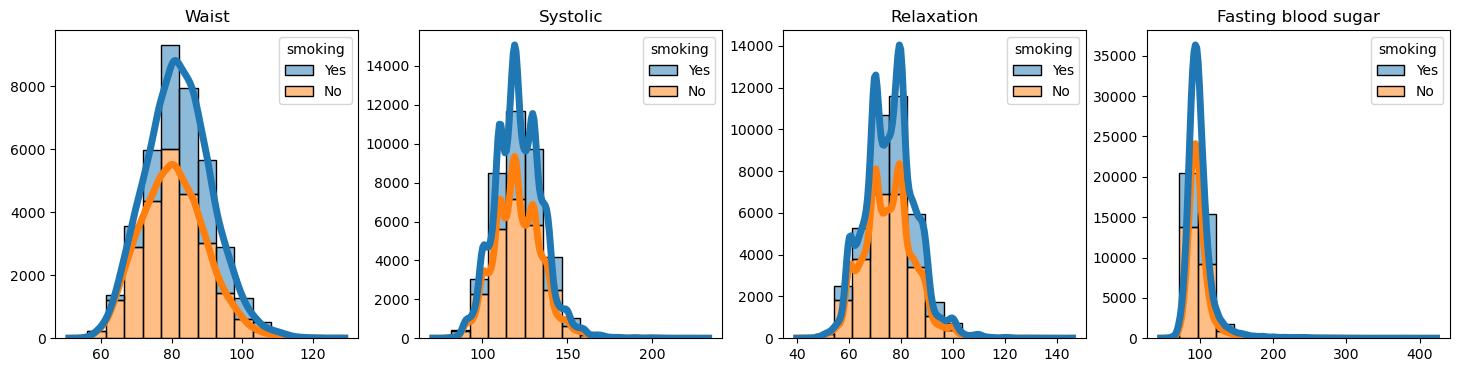

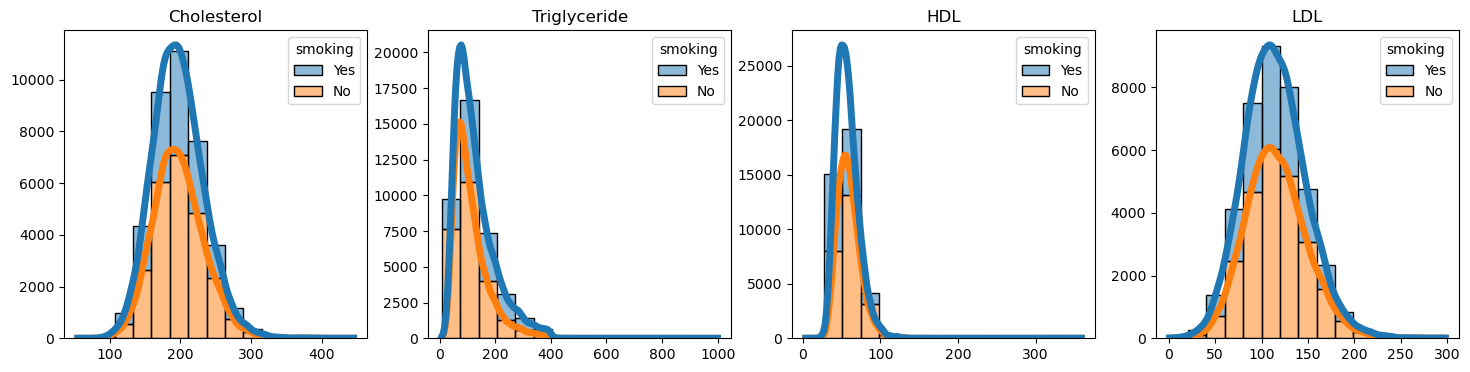

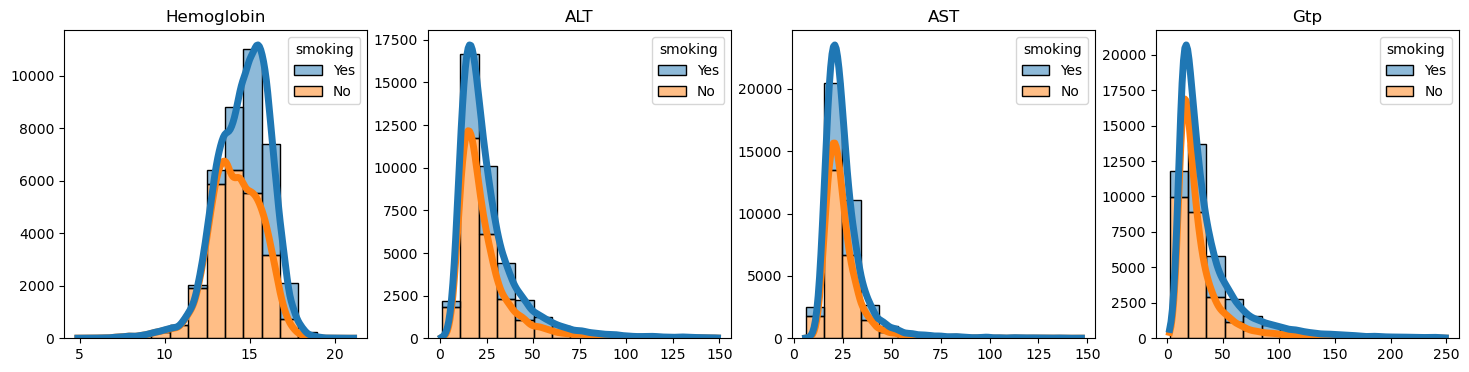

In [295]:
continual = ['waist(cm)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin', 'AST', 'ALT', 'Gtp']

plt.figure(figsize=(18, 4))

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 1)
histplot_continuous(x='waist(cm)', data=df, hue=hue, kde=True)
plt.title('Waist')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 2)
histplot_continuous(x='systolic', data=df, hue=hue, kde=True)
plt.title('Systolic')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 3)
histplot_continuous(x='relaxation', data=df, hue=hue, kde=True)
plt.title('Relaxation')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 4)
histplot_continuous(x='fasting blood sugar', data=df, hue=hue, kde=True)
plt.title('Fasting blood sugar')
plt.ylabel(None)
plt.xlabel(None)


plt.figure(figsize=(18, 4))

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 1)
histplot_continuous(x='Cholesterol', data=df, hue=hue, kde=True)
plt.title('Cholesterol')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 2)
histplot_continuous(x='triglyceride', data=df, hue=hue, kde=True)
plt.title('Triglyceride')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 3)
histplot_continuous(x='HDL', data=df, hue=hue, kde=True)
plt.title('HDL')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 4)
df_ldl = df[df['LDL'] < 300]
histplot_continuous(x='LDL', data=df_ldl, hue=hue, kde=True)
plt.title('LDL')
plt.ylabel(None)
plt.xlabel(None)


plt.figure(figsize=(18, 4))

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 1)
histplot_continuous(x='hemoglobin', data=df, hue=hue, kde=True)
plt.title('Hemoglobin')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 2)
df_alt = df[df['ALT'] < 150]
histplot_continuous(x='ALT', data=df_alt, hue=hue, kde=True)
plt.title('ALT')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 3)
df_ast = df[df['AST'] < 150]
histplot_continuous(x='AST', data=df_ast, hue=hue, kde=True)
plt.title('AST')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------

plt.subplot(n_row, n_col, 4)
df_gtp = df[df['Gtp'] < 250]
histplot_continuous(x='Gtp', data=df_gtp, hue=hue, kde=True)
plt.title('Gtp')
plt.ylabel(None)
plt.xlabel(None)

In [296]:
features = list(df.columns)
features.remove('eyesight(right)')
features.remove('hearing(right)')
features.remove('smoking')

С помощью тестов Мэнна-Уитни и ANOVA проверяем гипотезу об однородности курения с каждым признаком. Получающийся pvalue покажет, влияет ли данный признак на то, курит ли человек

In [298]:
results = []
for col in features:
    anova = stats.f_oneway(df[df['smoking']=='Yes'][col],df[df['smoking']=='No'][col]).pvalue
    mw = stats.mannwhitneyu(df[df['smoking']=='Yes'][col],df[df['smoking']=='No'][col]).pvalue
    results.append({
        'Feature': col,
        'ANOVA': anova,
        'Mann-Whitney': mw})
                   
results_df = pd.DataFrame(results)
for col in ['ANOVA', 'Mann-Whitney']:
    results_df[col] = results_df[col].apply(lambda p: f"{p:.2e}" if p < 1e-4 else f"{p:.4f}")
print(results_df.to_string(index=False))

            Feature     ANOVA Mann-Whitney
                age 1.20e-239    2.10e-240
         height(cm)  0.00e+00     0.00e+00
         weight(kg)  0.00e+00     0.00e+00
          waist(cm)  0.00e+00     0.00e+00
     eyesight(left)  7.96e-32     5.53e-80
      hearing(left)  1.30e-05     1.31e-05
           systolic  9.30e-44     2.82e-48
         relaxation  1.36e-93     3.48e-97
fasting blood sugar  4.87e-87     9.44e-91
        Cholesterol  5.66e-08     9.78e-07
       triglyceride  0.00e+00     0.00e+00
                HDL 1.24e-279     0.00e+00
                LDL  2.00e-16     2.17e-24
         hemoglobin  0.00e+00     0.00e+00
      Urine protein    0.0070       0.0295
   serum creatinine  0.00e+00     0.00e+00
                AST  2.09e-35     2.72e-91
                ALT  7.75e-85     0.00e+00
                Gtp  0.00e+00     0.00e+00
      dental caries 9.93e-101    3.68e-100


Если брать всю выборку, то результаты не показывают нужного нам результата, так как при большой выборке тесты Мэнна=Уитни и ANOVA не работают. Возьмем только первые 1000 наблюдений

In [300]:
df_small = df[:1000]
results = []
for col in features:
    anova = stats.f_oneway(df_small[df_small['smoking']=='Yes'][col],df_small[df_small['smoking']=='No'][col]).pvalue
    mw = stats.mannwhitneyu(df_small[df_small['smoking']=='Yes'][col],df_small[df_small['smoking']=='No'][col]).pvalue
    results.append({
        'Feature': col,
        'ANOVA': anova,
        'Mann-Whitney': mw})
                   
results_df = pd.DataFrame(results)
for col in ['ANOVA', 'Mann-Whitney']:
    results_df[col] = results_df[col].apply(lambda p: f"{p:.2e}" if p < 1e-4 else f"{p:.4f}")
print(results_df.to_string(index=False))

            Feature    ANOVA Mann-Whitney
                age   0.0006       0.0007
         height(cm) 8.58e-34     1.96e-31
         weight(kg) 4.75e-14     8.19e-16
          waist(cm) 4.42e-07     1.81e-07
     eyesight(left)   0.0134       0.0003
      hearing(left)   0.7716       0.7718
           systolic   0.0911       0.0872
         relaxation   0.1535       0.1098
fasting blood sugar   0.0010       0.0003
        Cholesterol   0.3181       0.2364
       triglyceride 5.47e-13     9.77e-12
                HDL 1.84e-07     3.60e-08
                LDL   0.2720       0.0813
         hemoglobin 2.18e-29     1.97e-28
      Urine protein   0.6226       0.5600
   serum creatinine 2.42e-20     1.53e-21
                AST   0.4983     2.37e-05
                ALT   0.1510     1.64e-10
                Gtp 2.21e-16     1.32e-30
      dental caries   0.0775       0.0776


## Выводы
Теперь видно, что многие признаки практически не влияют на то, курит ли человек, а точнее, не влияют: зрение, давление, холестерин, Gtp, наличие кариеса, протеин в моче и другие. Эти данные нужны будут при построении регрессионных моделей

# Регрессионные модели

In [304]:
def ConfusionMatrix(Y_test, Y_pred):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred))
    disp.plot()
    disp.ax_.grid(False) 
    plt.show()

In [305]:
df = pd.read_csv('smoker.csv')

In [306]:
X = df.drop('smoking', axis=1)
Y = df['smoking']

Далее будем пытаться предсказать, является ли человек курильщиком

## Обычная логистическая модель

In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test,Y_pred))
# print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.7263049890983712
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4975
           1       0.63      0.58      0.60      2822

    accuracy                           0.73      7797
   macro avg       0.70      0.69      0.70      7797
weighted avg       0.72      0.73      0.72      7797



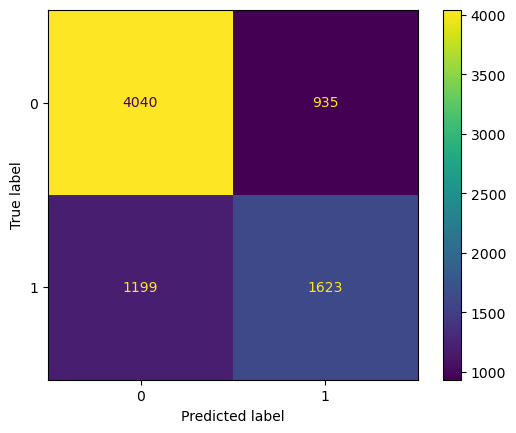

In [308]:
ConfusionMatrix(Y_test, Y_pred)

## Урезанная выборка

In [404]:
a = list(X.columns)
a.remove('hearing(right)')
a.remove('hearing(left)')
a.remove('Urine protein')
a.remove('relaxation')
a.remove('systolic')
a.remove('Cholesterol')
a.remove('LDL')
a.remove('dental caries')
a.remove('AST')
a.remove('ALT')

In [406]:
X2 = X[a]
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X2_train)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

model = LogisticRegression()
model.fit(X2_train, Y_train)

Y_pred = model.predict(X2_test)
print("Accuracy:", accuracy_score(Y_test,Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.7179684494036168
              precision    recall  f1-score   support

           0       0.77      0.81      0.78      4975
           1       0.62      0.56      0.59      2822

    accuracy                           0.72      7797
   macro avg       0.69      0.68      0.69      7797
weighted avg       0.71      0.72      0.71      7797



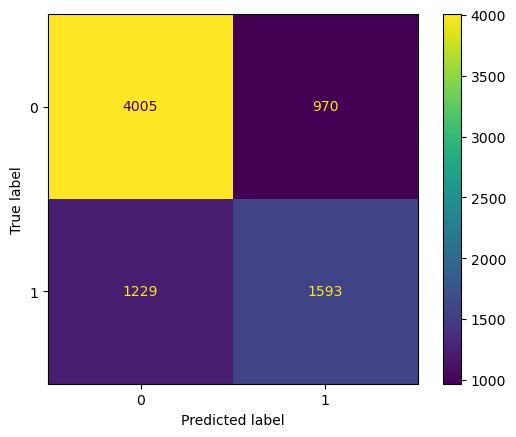

In [391]:
ConfusionMatrix(Y_test, Y_pred)

При построении обычной логистической регрессии accuracy получается 0.718, что является неплохим результатом. К тому же, при удалении признаков, которые не влияли на дальнейший анализ, точность падает всего на 0.01, что вообще незначительно, учитывая, что были удалены половина всех признаков.

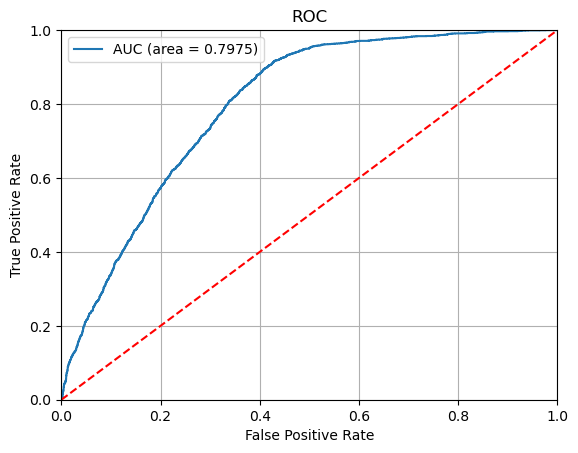

In [312]:
model_roc_auc = roc_auc_score(Y_test, model.predict_proba(X2_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X2_test)[:,1])
plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.0]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.grid(True)
plt.legend()
plt.show()

### Далее будем пробовать разные методы для улучшения точности

## Метод главных компонент

In [313]:
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)

In [314]:
pca = PCA()
X2_train = pca.fit_transform(X2_train)
X2_test = pca.transform(X2_test)

model = LogisticRegression()
model.fit(X2_train, Y_train)
Y_pred = model.predict(X2_test)

print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
#print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Accuracy:  0.7178401949467744
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4975
           1       0.62      0.56      0.59      2822

    accuracy                           0.72      7797
   macro avg       0.69      0.68      0.69      7797
weighted avg       0.71      0.72      0.71      7797



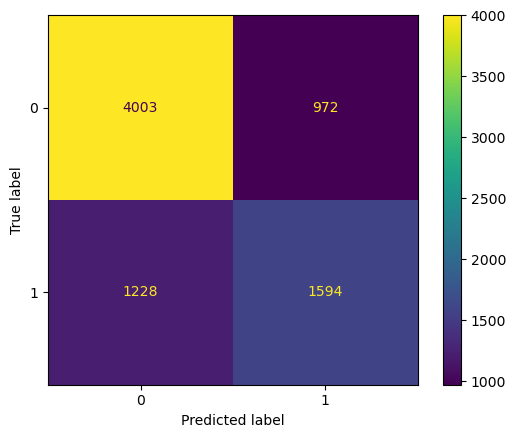

In [315]:
ConfusionMatrix(Y_test, Y_pred)

### Метод главных компонент не помог :(

## L1-регуляризация

In [316]:
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2, random_state=50)

In [317]:
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

model = LogisticRegression(penalty='l1', solver='saga', C=1.0, class_weight='balanced',max_iter=200, random_state=42)
model.fit(X2_train, Y_train)
Y_pred = model.predict(X2_test)
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy:  0.718737976144671
              precision    recall  f1-score   support

           0       0.85      0.68      0.75      4979
           1       0.58      0.79      0.67      2818

    accuracy                           0.72      7797
   macro avg       0.72      0.73      0.71      7797
weighted avg       0.75      0.72      0.72      7797



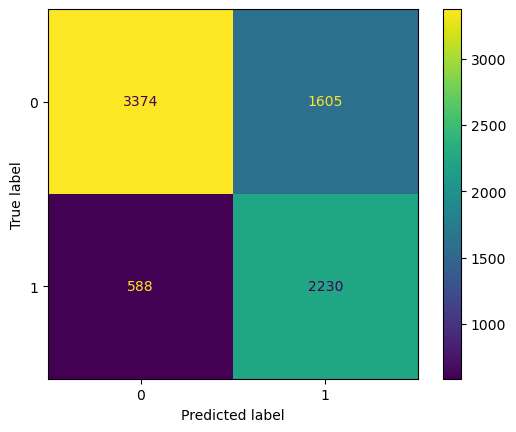

In [318]:
ConfusionMatrix(Y_test, Y_pred)

При использовании L1-регуляризации точность не изменилась, но данная модель намного лучше предсказывает курильщиков, а некурильщиков - хуже. При некоторых исследованиях данная модель может быть полезна, но она не самая точная

## Ядерный метод главных компонент

In [319]:
Scaler_X = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X2[:1000], Y[:1000], test_size = 0.2, random_state=42)
for kernels in ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']:
    #X_train  = Scaler_X.fit_transform(X_train)
    #X_test   = Scaler_X.transform(X_test)
    kpca = KernelPCA(n_components = 2, kernel = kernels)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Accuracy¡: %.4f' % accuracy_score(Y_test, Y_pred))
    print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Accuracy¡: 0.6850
Confusion matrix:
 [[118   9]
 [ 54  19]]
Accuracy¡: 0.6450
Confusion matrix:
 [[122   5]
 [ 66   7]]
Accuracy¡: 0.6350
Confusion matrix:
 [[127   0]
 [ 73   0]]
Accuracy¡: 0.6350
Confusion matrix:
 [[127   0]
 [ 73   0]]
Accuracy¡: 0.6350
Confusion matrix:
 [[127   0]
 [ 73   0]]


### Результаты очень печальные, вообще не умеет предсказывать курильщиков, все ЗОЖники

# Random Forest

Random Forest — это множество решающих деревьев, обученных на разных подвыборках данных и с разными случайными подмножествами признаков.

## Как работает

1. **Bootstrap‐sampling**  
   - Генерируется \(B\) подвыборок (с возвращением) из исходных данных.  
   - В каждой подвыборке около 63 % уникальных объектов, 37 % — дубликатов.

2. **Обучение деревьев**  
   - Для каждого набора строится своё дерево решений.  
   - При каждом расщеплении узла выбираются случайные \(m\) признаков (из всех \(p\)), и среди них ищется лучший порог по критерию Gini или энтропии.

3. **Агрегация ответов**  
   - **Классификация:** каждый из \(B\) деревьев “голосует”, итоговый класс — большинство голосов.  
   - **Регрессия:** усреднение прогнозов всех деревьев.

In [321]:
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)

In [322]:
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X2_train, Y_train)
Y_pred = rf.predict(X2_test)
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy:  0.7951776324227267
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4975
           1       0.72      0.71      0.72      2822

    accuracy                           0.80      7797
   macro avg       0.78      0.78      0.78      7797
weighted avg       0.79      0.80      0.80      7797



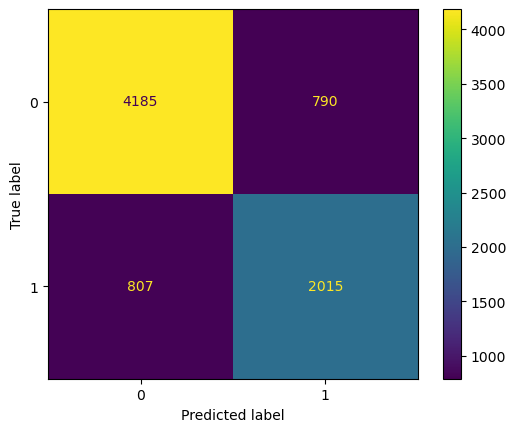

In [323]:
ConfusionMatrix(Y_test, Y_pred)

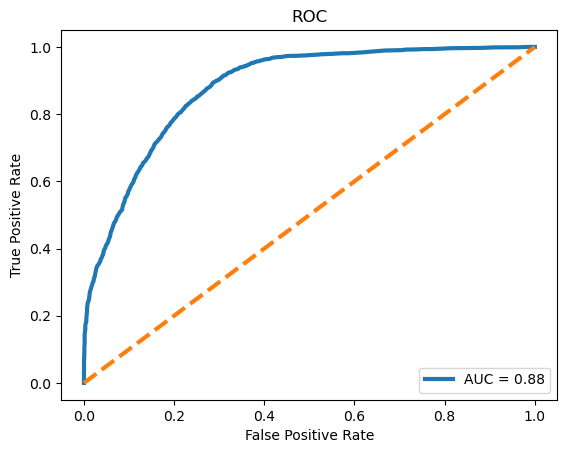

In [324]:
y_score = rf.predict_proba(X2_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, lw=3, label=f"AUC = {roc_auc:.2f}")
ax.plot([0, 1], [0, 1], '--', lw=3)

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC")
ax.legend(loc="lower right")
plt.show()

### RandomForest дает лучшую точность данной модели (0.88). Она хорошо предсказывает курильщиков, при этом без потерь при предсказывании некурильщиков

## Спасибо за внимание!
```
 /\_/\
( o.o )
 > ^ <
```